# 기반 코드

## lgo 에서 화면에 무언가를 보여주는 기반 코드

```go
type jupyterDisplayer func(data *scaffold.DisplayData, update bool)

func (d jupyterDisplayer) display(data *scaffold.DisplayData, id *string) 

func (d jupyterDisplayer) displayString(contentType, content string, id *string) 

func (d jupyterDisplayer) displayBytes(contentType string, content []byte, id *string) 
```

scaffold DisplayData 의 경우는 좀 이따가 보고, 위에서 문자열과 바이트를 보여주는 API를 통해서 아래로 확장을 한다. 이름이 소문자일 경우 외부에 공개가 안 되는 내부 API 인 것 잘 알거다.

```go
func (d jupyterDisplayer) JavaScript(s string, id *string) {
	d.displayString("application/javascript", s, id)
}
func (d jupyterDisplayer) HTML(s string, id *string)     { d.displayString("text/html", s, id) }
func (d jupyterDisplayer) Markdown(s string, id *string) { d.displayString("text/markdown", s, id) }
func (d jupyterDisplayer) Latex(s string, id *string)    { d.displayString("text/latex", s, id) }
func (d jupyterDisplayer) SVG(s string, id *string)      { panic("Not implemented") }
func (d jupyterDisplayer) PNG(b []byte, id *string)      { d.displayBytes("image/png", b, id) }
func (d jupyterDisplayer) JPEG(b []byte, id *string)     { d.displayBytes("image/jpeg", b, id) }
func (d jupyterDisplayer) GIF(b []byte, id *string)      { d.displayBytes("image/gif", b, id) }
func (d jupyterDisplayer) PDF(b []byte, id *string)      { d.displayBytes("application/pdf", b, id) }
func (d jupyterDisplayer) Text(s string, id *string)     { d.displayString("text/plain", s, id) }

```

문자열, 자바스크립트, HTML, 마크다운, 라텍스, SVG 까지는 문자열 데이터 보여주기.

PNG, JPEG, GIF, PDF 는 바이트 데이터 보여주기로 사용된다.

## 쥬피터 클라이언트 쪽 DisplayData 

[여기](https://github.com/yunabe/lgo/blob/4c75b40ccf8f20299a62af85215377927675eacb/jupyter/gojupyterscaffold/api.go#L99)를 보면 DisplayData 구조체를 쥬피터 클라이언트의 Display Data 를 매개헤주는 것이다.

그리고 [여기](http://jupyter-client.readthedocs.io/en/latest/messaging.html#display-data) 설명을 보면 이것은 프론트엔드로 되돌려져서 보여져야할 메시지에 사용된다고 하며 적절한 MIME 타입을 가진 JSON 형태의 자료라고 한다.

## 코드 예시 

## 문자열 - 자바스크립트, HTML, 마크다운, 라텍스, SVG 

### Text

div 내부에 출력되지만 pre 코드가 붙어있어서 줄바꿈이 적용된다.

In [5]:
_ctx.Display.Text("문자열 출력",nil)

문자열 출력

```html
<div class="output_subarea output_text"><pre>문자열 출력</pre></div>
```

### HTML

일반 문자열은 pre 없이 출력되고 tag 는 그냥 tag 로 나오며 이너 스크립트도 잘 작동한다.

#### 일반 문자열

In [6]:
// Display HTML
_ctx.Display.HTML(`HTML 출력`, nil)

HTML 출력

```html
<div class="output_subarea output_html rendered_html">HTML 출력</div>
```

### Javscript

#### html tag 와 자바스크립트

#####  인라인 자바스크립트

In [9]:
_ctx.Display.HTML(`
<button type="button"
onclick="document.getElementById('데모').innerHTML = Date()">

시간과 날짜를 보려면 나를 클릭해요</button>

<p id="데모"></p>`,nil)

시간과 날짜를 보려면 나를 클릭해요

```html
<div class="output_subarea output_html rendered_html">
<button type="button" onclick="document.getElementById('데모').innerHTML = Date()">

시간과 날짜를 보려면 나를 클릭해요</button>

<p id="데모"></p></div>
```

##### 독립 자바스크립트

In [51]:
_ctx.Display.HTML(`
<button type="button" onclick="지역날짜보이기()">
시간과 날짜를 보려면 나를 클릭해요</button>
<p id="데모2"></p>`,nil)

_ctx.Display.JavaScript(`
function 지역날짜보이기() {
    document.getElementById('데모2').innerHTML = Date();
}`,nil)

시간과 날짜를 보려면 나를 클릭해요

함수 선언은 동작하지 않는다. 위에서 버튼을 눌러도 undefined 오류 뜸. 아마도 전역이 아닌 특정 스콥 내부에서 선언되기 때문인 것 같다.

다음처럼 자바스크립트 전역객체인 window 에 선언을 하면 작동한다.

In [100]:
_ctx.Display.HTML(`
<button type="button" onclick="날짜보이기()">
시간과 날짜를 보려면 나를 클릭해요</button>
<p id="데모3"></p>`,nil)

_ctx.Display.JavaScript(`
window.날짜보이기 = function() {
    document.getElementById('데모3').innerHTML = Date();
}`,nil)

시간과 날짜를 보려면 나를 클릭해요

setInterval 도 잘 먹힌다.

In [104]:
_ctx.Display.HTML(`
<button type="button" onclick="날짜보이기()">
시간과 날짜를 보려면 나를 클릭해요</button>
<p id="데모4"></p>`,nil)

_ctx.Display.JavaScript(`
window.날짜보이기 = function() {
    document.getElementById('데모4').innerHTML = Date();
}

setInterval(function(){ 날짜보이기() }, 100);
`,nil)


시간과 날짜를 보려면 나를 클릭해요

### Markdown

마크다운 잘 표시된다.

In [55]:
_ctx.Display.Markdown(`
## 이것은 
#### 마크다운

**테스트** 입니다.
`,nil)


## 이것은 
#### 마크다운

**테스트** 입니다.


### Latex

[수식편집기](https://ko.numberempire.com/latexequationeditor.php) 에서 편집한 문자열을 넣으면 렌더링 한다. 

begin 과 end 사이에다가.. 이건 왜 그런 지 모르겠음.

다만, 결과창을 한 번 클릭해야만 렌더링이 됨.. 구린데?

In [67]:
_ctx.Display.Latex(`
\begin{equation}\label{eq:}

\frac{\partial f}{\partial x} = 2\,\sqrt{a}\,x

\end{equation}

`,nil)

### SVG

아직 이식이 안 됐다.

In [ ]:
_ctx.Display.SVG(`

`,nil)

## 바이트 - PNG, JPEG, GIF, PDF

바이트를 보여주려면.. 
1. 소스로부터 읽는다.
2. 바이트 타입 변수에 넣는다.
3. 보여준다.

바이트를 png, jpeg 로 보여주려면 디코드 된 이미지 바이트들을 해당 규격으로 인코드를 해줘야 한다.


### PNG

파일에서 읽건 인터넷으로 읽건... ioutil 로 읽어야 함...

현재는 png 자체를 통째로 읽어서 바로 png 보여주기 처리함.

PNG 인코드됨

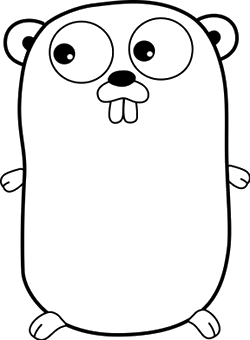

In [84]:
import (
    "fmt"
    "io/ioutil"
    "net/http"    
)

// 바이트 변수 선언
var gopherPNG []byte
{
    res, err := http.Get("https://golang.org/doc/gopher/frontpage.png")
    if err != nil {
        fmt.Printf("Failed to get: %v\n", err)
        return
    }
    defer res.Body.Close()
    
    // PNG 인코등 된 바이트들을 읽어서 바이트 변수에 담기
    gopherPNG, err = ioutil.ReadAll(res.Body)
    if err != nil {
        fmt.Printf("Failed to read: %v\n", err)
        return
    }
    _ctx.Display.Text("PNG 인코드됨", nil)
    // 보여주기
    _ctx.Display.PNG(gopherPNG, nil)
}

### JPEG

아래는 PNG 로 인코드 된 바이트들을 디코드 후 JPEG 로 다시 인코드해서 보여주는 예시다.

Resized PNG - encoded PNG

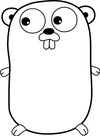

Highly encoded & compressed JPEG

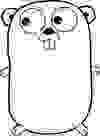

In [105]:
import (
    "bytes"
    "image"
    png "image/png"
    jpeg "image/jpeg"
    "os"
    
    "github.com/nfnt/resize"
)

{
    // 위에서 바이트로된 PNG 데이터를 가지고 새 바이트 버퍼를 만든 다음
    // 그것을 디코드 해서 특정 규격으로 인코딩 되지 않은 이미지 바이트 만든다.
    img, err := png.Decode(bytes.NewBuffer(gopherPNG))
    if err != nil {
        fmt.Fprintf(os.Stderr, "Failed to decode:", err)
        return
    }
    // 디코드 한 이미지 사이즈를 바꾼다.
    img = resize.Resize(100, 0, img, resize.Lanczos3)
    
    // 버퍼를 새로 만들고
    var buf bytes.Buffer
    
    // png 규격으로 다시 인코드 한다.
    err = png.Encode(&buf, img)
    if err != nil {
        fmt.Fprintf(os.Stderr, "Failed to encode:", err)
        return
    }
    // 사이즈가 줄어든 이미지
    _ctx.Display.Text("Resized PNG - encoded PNG", nil)
    _ctx.Display.PNG(buf.Bytes(), nil)
    
    // 인코드 한 것을 초기화한 후 jpg 로 인코드하고 보여준다.
    buf.Reset()
    jpeg.Encode(&buf, img, &jpeg.Options{Quality: 1})
    _ctx.Display.Text("Highly encoded & compressed JPEG", nil)
    _ctx.Display.JPEG(buf.Bytes(), nil)
}

### GIF

[여기](https://golang.org/pkg/image/gif/#Encode)에 인코드 API 있다.

Gif 로 인코드 됨

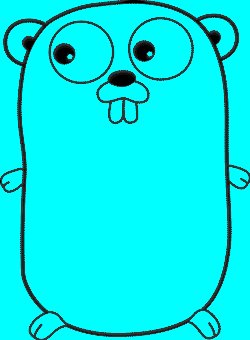

In [99]:
import (
    "bytes"
    "image"
    png "image/png"
    gif "image/gif"
    "os"
)

{
    // 위에서 바이트로된 PNG 데이터를 가지고 새 바이트 버퍼를 만든 다음
    // 그것을 디코드 해서 특정 규격으로 인코딩 되지 않은 이미지 바이트 만든다.
    img, err := png.Decode(bytes.NewBuffer(gopherPNG))
    if err != nil {
        fmt.Fprintf(os.Stderr, "Failed to decode:", err)
        return
    }
    
    // 버퍼를 새로 만들고
    var buf bytes.Buffer
    
    // gif 규격으로 다시 인코드 하고 60 가지 색 범위에서 이미지를 표현한다.
    err = gif.Encode(&buf, img, &gif.Options{NumColors : 60})
    if err != nil {
        fmt.Fprintf(os.Stderr, "Failed to encode:", err)
        return
    }
    
    _ctx.Display.Text("Gif 로 인코드 됨", nil)
    _ctx.Display.GIF(buf.Bytes(), nil)
}

### PDF

음.. 이거 보여야 하나? 아래에서 통째로 pdf 넘겨줬는데 잘 안 보인다.

당장 필요 없으니까 구지 신경쓰지 말자.

In [94]:
import (
    "fmt"
    "io/ioutil"
    "net/http"   
    "time"
)

// 바이트 변수 선언
var gopherPDF []byte
{
    timeout := time.Duration(60 * time.Second)
    client := http.Client{
        Timeout: timeout,
    }
    res, err := client.Get("https://elinux.org/images/9/9b/Linux-tiny.pdf")
    if err != nil {
        fmt.Printf("Failed to get: %v\n", err)
        return
    }
    defer res.Body.Close()
    
    // PNG 인코등 된 바이트들을 읽어서 바이트 변수에 담기
    gopherPDF, err = ioutil.ReadAll(res.Body)
    if err != nil {
        fmt.Printf("Failed to read: %v\n", err)
        return
    }
    _ctx.Display.Text("PDF 를 바이트로 받아서 통째로 넘겨서 보여준다.", nil)
    // 보여주기
    _ctx.Display.PDF(gopherPDF, nil)
}

PDF 를 바이트로 받아서 통째로 넘겨서 보여준다.

## 출력을 주기적으로 업데이트하기

for 루프를 사용해서..

Gif 로 %!s(int=4) 색 보여짐

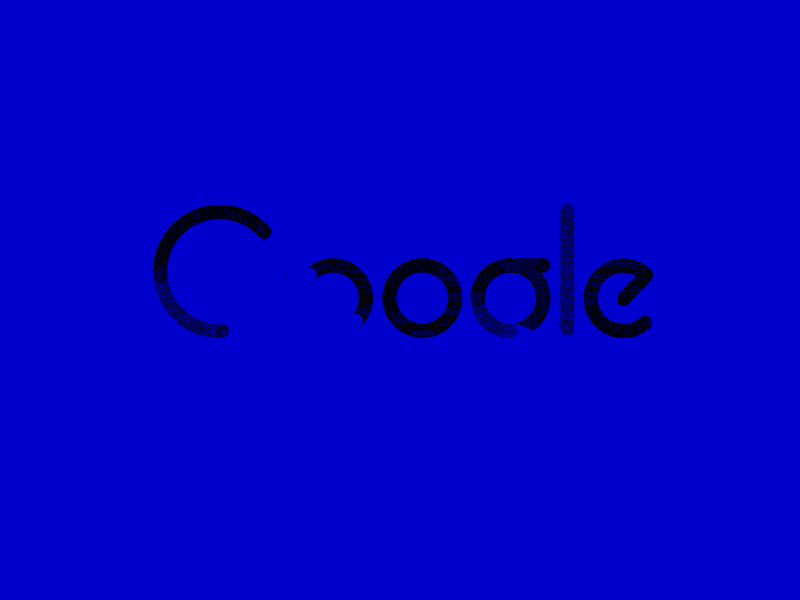

In [140]:
import (
    "bytes"
    "image"
    png "image/png"
    gif "image/gif"
    "os"
)

var fromInternet []byte
{

    res, err := http.Get("https://media.giphy.com/media/OfKuym1ZhnQWI/giphy.gif")
    defer res.Body.Close()
    
    fromInternet, err = ioutil.ReadAll(res.Body)
    img, err := gif.Decode(bytes.NewBuffer(fromInternet))
    
    var labelID, imgID string
    
    for colors := 256; colors > 0; colors -= 4 {
    
        var buf bytes.Buffer

        // gif 규격으로 다시 인코드 하고 색 범위를 줄여가며 인코딩한다.
        err = gif.Encode(&buf, img, &gif.Options{NumColors : colors})
        if err != nil {
            fmt.Fprintf(os.Stderr, "Failed to encode:", err)
            return
        }

        message := fmt.Sprintf("Gif 로 %s 색 보여짐", colors)

        _ctx.Display.Text(message, &labelID)
        _ctx.Display.GIF(buf.Bytes(), &imgID)
    }   
}

티커, 고루틴, 채널을 이용해서 3초마다.

[여기](https://stackoverflow.com/questions/16466320/is-there-a-way-to-do-repetitive-tasks-at-intervals-in-golang)

Gif 로 %!s(int=-24) 색 보여짐

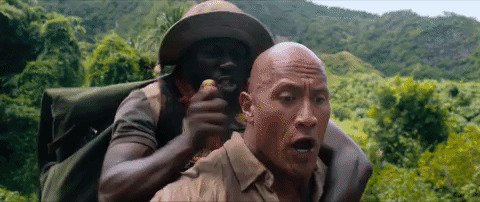

In [139]:
import (
    "bytes"
    "image"
    png "image/png"
    gif "image/gif"
    "os"
)

var fromInternet []byte
{

    res, err := http.Get("https://media.giphy.com/media/69EjftQol6uErqVZc7/giphy.gif")
    defer res.Body.Close()
    
    fromInternet, err = ioutil.ReadAll(res.Body)
    img, err := gif.Decode(bytes.NewBuffer(fromInternet))
    
    var labelID, imgID string
    
    
    ticker := time.NewTicker(3 * time.Second)

    quit := make(chan struct{})
    
    colors := 256
    
    go func() {
        for {
           select {
            case <- ticker.C:
               
               var buf bytes.Buffer

                // gif 규격으로 다시 인코드 하고 색 범위를 줄여가며 인코딩한다.
                err = gif.Encode(&buf, img, &gif.Options{NumColors : colors})
                if err != nil {
                    fmt.Fprintf(os.Stderr, "Failed to encode:", err)
                    return
                }

                message := fmt.Sprintf("Gif 로 %s 색 보여짐", colors)

                _ctx.Display.Text(message, &labelID)
                _ctx.Display.GIF(buf.Bytes(), &imgID)
               
               if colors < 0 {
                   close(quit)
                   // ticker.Stop()
               }else {
                   colors -= 35
               }
               
            case <- quit:
                ticker.Stop()
                return
            }
        }
     }()
}


